In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [28]:
df_1 = pd.read_csv ('clean_df.csv') # This df has non-log-transformed variables. This will be helpful when writing visualizations
df_1.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,343,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49,2


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('final_df.csv')
df.head()

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,waterfront_1_0,yr_built_1900_1940,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4
0,7129300520,0.038550,0.314203,0.250000,1.0,3,7,0.0,0.0,286,10,0.358392,0.322166,0.441342,0.295858,-0.899903,0,0,1,0,0,0,0,0,0,1,0,0,0
1,6414100192,0.071204,0.314203,0.542481,2.0,3,7,400.0,1991.0,343,12,0.546652,0.538392,0.525882,0.326644,-0.787260,0,0,1,0,0,0,0,0,0,1,0,0,0
2,5631500400,0.030834,0.198240,0.250000,1.0,3,6,0.0,0.0,56,2,0.226478,0.203585,0.699256,0.366664,-0.899903,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,0.075471,0.396480,0.646241,1.0,5,7,910.0,0.0,343,12,0.322322,0.463123,0.446739,0.280700,-0.747300,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1954400510,0.069234,0.314203,0.500000,1.0,3,8,0.0,0.0,49,2,0.467563,0.420302,0.548854,0.340224,-0.803621,0,0,0,0,1,0,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21143 non-null  int64  
 1   price               21143 non-null  float64
 2   bedrooms            21143 non-null  float64
 3   bathrooms           21143 non-null  float64
 4   floors              21143 non-null  float64
 5   condition           21143 non-null  int64  
 6   grade               21143 non-null  int64  
 7   sqft_basement       21143 non-null  float64
 8   yr_renovated        21143 non-null  float64
 9   day_of_year         21143 non-null  int64  
 10  month               21143 non-null  int64  
 11  log_sqft_above      21143 non-null  float64
 12  log_sqft_living     21143 non-null  float64
 13  log_sqft_living15   21143 non-null  float64
 14  log_sqft_lot        21143 non-null  float64
 15  log_sqft_lot15      21143 non-null  float64
 16  wate

# Official Model 1
- Preliminary Versions can be found in a separate notebook

In [6]:
outcome = 'price'
predictors = df.drop(['price', 'sqft_basement', 'id', 'yr_renovated'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3956.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:34:32   Log-Likelihood:                 71350.
No. Observations:               21143   AIC:                        -1.426e+05
Df Residuals:                   21118   BIC:                        -1.425e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0033      0.001     -4.026      0.000      -0.005      -0.002
bedrooms              -0.0095      0.001     -9.720      0.000      -0.011      -0.008
bathrooms              0.0061      0.001      8.103      0.000       0.005       0.008
floors                -0.0002      0.000     -0.988      0.323      -0.001       0.000
condition              0.0024   9.89e-05     24.382      0.000       0.002       0.003
grade                  0.0050   8.76e-05     56.921      0.000       0.005       0.005
day_of_year        -2.273e-05   6.61e-06     -3.440      0.001   -3.57e-05   -9.78e-06
month                  0.0005      0.000      2.444      0.015    9.71e-05       0.001
log_sqft_above         0.0075      0.001      6.577      0.000       0.005       0.010
log_sqft_living        0.0448      0.001     32.250      0.000       0.042       0.047
log_sqft_living15      0.0172      0.001     21.448      0.000       0.016       0.019
log_sqft_lot           0.0112      0.001     15.522      0.000       0.010       0.013
log_sqft_lot15         0.0057      0.001      7.832      0.000       0.004       0.007
waterfront_1_0         0.0233      0.001     32.862      0.000       0.022       0.025
yr_built_1900_1940    -0.0025      0.001     -2.772      0.006      -0.004      -0.001
yr_built_1940_1960    -0.0067      0.001     -7.321      0.000      -0.009      -0.005
yr_built_1960_1980    -0.0094      0.001    -10.181      0.000      -0.011      -0.008
yr_built_1980_2000    -0.0094      0.001    -10.167      0.000      -0.011      -0.008
yr_built_2000_2020    -0.0077      0.001     -8.293      0.000      -0.010      -0.006
renovpost2000_1        0.0052      0.000     11.225      0.000       0.004       0.006
high_zip_1             0.0103      0.000     50.141      0.000       0.010       0.011
low_zip_1             -0.0060      0.000    -23.426      0.000      -0.006      -0.005
sector_1               0.0039      0.001      3.698      0.000       0.002       0.006
sector_2               0.0004      0.001      0.355      0.723      -0.002       0.002
sector_3              -0.0113      0.001    -10.540      0.000      -0.013      -0.009
sector_4              -0.0119      0.001    -11.193      0.000      -0.014      -0.010
==============================================================================
Omnibus:                      631.857   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1489.462
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                       4.271   Cond. No.                     6.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

### Incredible R-Squared! Let's dig in and examine the errors. 

In [7]:
data = df
y = data['price']
X = data.drop(['price','id','sqft_basement', 'yr_renovated'], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 6.898048290608584e-05
Test Mean Squarred Error: 6.723546611238528e-05


In [10]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 0.00830544898883172
Test Root Mean Squarred Error: 0.00819972353877771


### ...I do not know how to react... the model's ability to predict comes within a few cents?

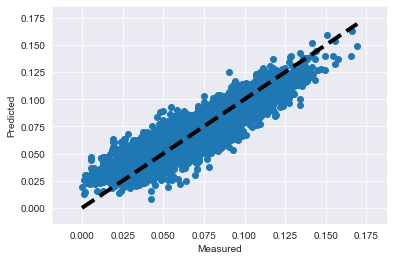

In [11]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

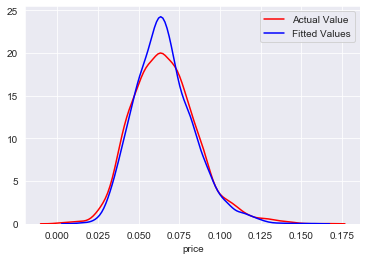

In [12]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [13]:
# Difference between what we expect and the actual values. Could be due to all the normalizing we did? 
# I wonder if log-transforming the price had something to do with this.
# There also may be some multicollinearity here (See the warning at the bottom of the model)
# Will try to make one more model after checking for normality and homoscedasticity of this one. 

## Check for Normality

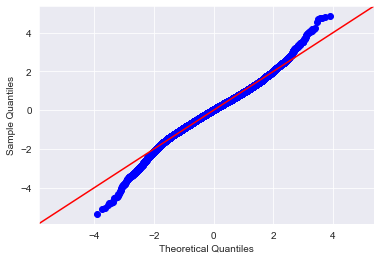

In [14]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [15]:
# Heaviness in the tails noted. 

### Check for Homoscedasticity

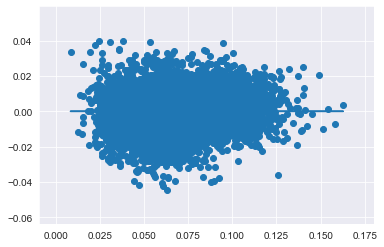

In [16]:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(df))]);

In [17]:
# We seem pretty homoscedastic here! # Our coefficients therefore seem to be pretty representative of the population?

In [18]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

In [19]:
cv_10_results

array([-6.84933282e-05, -7.06922075e-05, -6.96536645e-05, -7.31715538e-05,
       -6.59806286e-05, -6.93451513e-05, -6.79353702e-05, -6.96963288e-05,
       -7.32527020e-05, -6.07146165e-05])

In [20]:
print('Test Mean Squarred Error:', mse_test)
print ('Results of 10-fold cross-validation test: ', cv_10_results.mean())

Test Mean Squarred Error: 6.723546611238528e-05
Results of 10-fold cross-validation test:  -6.889355513247468e-05


In [21]:
# We can stop here, it seems.
# However things may not always be how they seem. I'd like to try one or two more models removing some of the variables that could be 
# causing multicollinearity. 

## Above model looks great but possibly too good to be true.
- Will try to drop some columns and reevaluate. 

In [22]:
abs(df.corr()) > 0.7

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,waterfront_1_0,yr_built_1900_1940,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
day_of_year,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


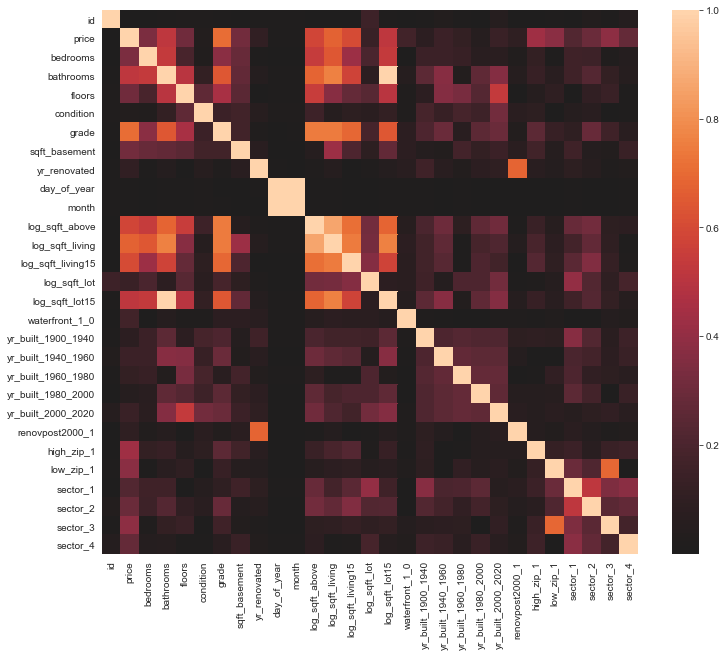

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

In [24]:
# Correlation Alarms: Bathrooms with log_sqft_lot15, day_of_year and month, log_sqft_above, log_sqft_living, log_sqft_living15
# Drop: log_sqft_lot15, log_sqft_above

In [25]:
outcome = 'price'
predictors = df.drop(['price', 'sqft_basement', 'id', 'yr_renovated', 'log_sqft_lot15', 'log_sqft_above', 'grade'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     3561.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:34:41   Log-Likelihood:                 69716.
No. Observations:               21143   AIC:                        -1.394e+05
Df Residuals:                   21120   BIC:                        -1.392e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0089      0.002      5.540      0.000       0.006       0.012
bedrooms              -0.0169      0.001    -16.165      0.000      -0.019      -0.015
bathrooms              0.0083      0.001     10.378      0.000       0.007       0.010
floors                 0.0016      0.000      9.783      0.000       0.001       0.002
condition              0.0024      0.000     22.069      0.000       0.002       0.003
day_of_year        -2.634e-05   7.14e-06     -3.691      0.000   -4.03e-05   -1.24e-05
month                  0.0006      0.000      2.750      0.006       0.000       0.001
log_sqft_living        0.0741      0.001     64.258      0.000       0.072       0.076
log_sqft_living15      0.0296      0.001     35.389      0.000       0.028       0.031
log_sqft_lot           0.0139      0.001     18.382      0.000       0.012       0.015
waterfront_1_0         0.0249      0.001     32.561      0.000       0.023       0.026
yr_built_1900_1940    -0.0019      0.001     -1.879      0.060      -0.004       8e-05
yr_built_1940_1960    -0.0053      0.001     -5.359      0.000      -0.007      -0.003
yr_built_1960_1980    -0.0069      0.001     -6.911      0.000      -0.009      -0.005
yr_built_1980_2000    -0.0053      0.001     -5.355      0.000      -0.007      -0.003
yr_built_2000_2020    -0.0037      0.001     -3.681      0.000      -0.006      -0.002
renovpost2000_1        0.0064      0.001     12.776      0.000       0.005       0.007
high_zip_1             0.0123      0.000     55.957      0.000       0.012       0.013
low_zip_1             -0.0060      0.000    -22.012      0.000      -0.007      -0.006
sector_1               0.0040      0.001      3.520      0.000       0.002       0.006
sector_2              -0.0002      0.001     -0.180      0.857      -0.002       0.002
sector_3              -0.0125      0.001    -10.785      0.000      -0.015      -0.010
sector_4              -0.0139      0.001    -12.055      0.000      -0.016      -0.012
==============================================================================
Omnibus:                      549.626   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1149.067
Skew:                          -0.154   Prob(JB):                    3.04e-250
Kurtosis:                       4.100   Cond. No.                     9.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Try one more and drop Sector_2, it has a very high p-value

In [27]:
outcome = 'price'
predictors = df.drop(['price', 'sqft_basement', 'id', 'yr_renovated', 'log_sqft_lot15', 'log_sqft_above', 'grade', 'day_of_year','sector_2'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     3914.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:34:41   Log-Likelihood:                 69709.
No. Observations:               21143   AIC:                        -1.394e+05
Df Residuals:                   21122   BIC:                        -1.392e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0091      0.001      7.859      0.000       0.007       0.011
bedrooms              -0.0169      0.001    -16.141      0.000      -0.019      -0.015
bathrooms              0.0083      0.001     10.358      0.000       0.007       0.010
floors                 0.0016      0.000      9.798      0.000       0.001       0.002
condition              0.0024      0.000     22.081      0.000       0.002       0.003
month                 -0.0002   1.98e-05    -10.159      0.000      -0.000      -0.000
log_sqft_living        0.0741      0.001     64.235      0.000       0.072       0.076
log_sqft_living15      0.0297      0.001     35.418      0.000       0.028       0.031
log_sqft_lot           0.0139      0.001     18.387      0.000       0.012       0.015
waterfront_1_0         0.0249      0.001     32.508      0.000       0.023       0.026
yr_built_1900_1940    -0.0019      0.001     -1.878      0.060      -0.004    8.15e-05
yr_built_1940_1960    -0.0053      0.001     -5.355      0.000      -0.007      -0.003
yr_built_1960_1980    -0.0068      0.001     -6.899      0.000      -0.009      -0.005
yr_built_1980_2000    -0.0053      0.001     -5.353      0.000      -0.007      -0.003
yr_built_2000_2020    -0.0037      0.001     -3.671      0.000      -0.006      -0.002
renovpost2000_1        0.0064      0.001     12.752      0.000       0.005       0.007
high_zip_1             0.0123      0.000     55.962      0.000       0.012       0.013
low_zip_1             -0.0060      0.000    -22.032      0.000      -0.007      -0.006
sector_1               0.0042      0.000     22.820      0.000       0.004       0.005
sector_3              -0.0123      0.000    -44.229      0.000      -0.013      -0.012
sector_4              -0.0137      0.000    -67.660      0.000      -0.014      -0.013
==============================================================================
Omnibus:                      549.209   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1149.683
Skew:                          -0.153   Prob(JB):                    2.24e-250
Kurtosis:                       4.101   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ERROR ALERT: You cannot accurately predict error using transformed predictor variables.
- To get the continuous variables in their original state I will take their untransformed values from df_1

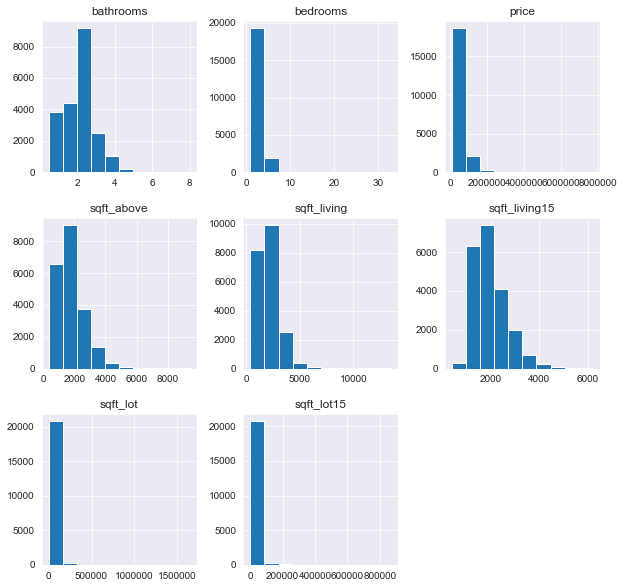

In [30]:
# Copy the df, now that the model has been fit 
df_unlog = df.copy()

# Grab the original data from df_1 (A saved dataframe holding the untransformed variables)
sqft_living = df_1['sqft_living']
sqft_lot = df_1['sqft_lot']
sqft_above = df_1['sqft_above']
sqft_living15 = df_1['sqft_living15']
sqft_lot15 = df_1['sqft_lot15']
price = df_1['price']
bedrooms = df_1['bedrooms']
bathrooms = df_1['bathrooms']

# Make a list of the unlogged (read: original) columns
unlogs = ['sqft_above', 'sqft_living', 'sqft_living15' , 'sqft_lot', 
          'sqft_lot15', 'bathrooms', 'bedrooms', 'price']

#Create new variables for each column
df_unlog['sqft_above'] = sqft_above
df_unlog['sqft_living'] = sqft_living
df_unlog['sqft_living15'] = sqft_living15
df_unlog['sqft_lot'] = sqft_lot
df_unlog['sqft_lot15'] = sqft_lot15
df_unlog['price'] = price
df_unlog['bedrooms'] = bedrooms
df_unlog['bathrooms'] = bathrooms
# Check results with a histogram
df_unlog[unlogs].hist(figsize=(10,10));

In [31]:
df_unlog.head()

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,waterfront_1_0,yr_built_1900_1940,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15
0,7129300520,221900.0,3,1.00,1.0,3,7,0.0,0.0,286,10,0.358392,0.322166,0.441342,0.295858,-0.899903,0,0,1,0,0,0,0,0,0,1,0,0,0,1180,1180,1340,5650,5650
1,6414100192,538000.0,3,2.25,2.0,3,7,400.0,1991.0,343,12,0.546652,0.538392,0.525882,0.326644,-0.787260,0,0,1,0,0,0,0,0,0,1,0,0,0,2170,2570,1690,7242,7639
2,5631500400,180000.0,2,1.00,1.0,3,6,0.0,0.0,56,2,0.226478,0.203585,0.699256,0.366664,-0.899903,0,1,0,0,0,0,0,0,0,1,0,0,0,770,770,2720,10000,8062
3,2487200875,604000.0,4,3.00,1.0,5,7,910.0,0.0,343,12,0.322322,0.463123,0.446739,0.280700,-0.747300,0,0,0,1,0,0,0,0,0,1,0,0,0,1050,1960,1360,5000,5000
4,1954400510,510000.0,3,2.00,1.0,3,8,0.0,0.0,49,2,0.467563,0.420302,0.548854,0.340224,-0.803621,0,0,0,0,1,0,0,0,0,0,1,0,0,1680,1680,1800,8080,7503


In [32]:
df_unlog = df_unlog.drop(['log_sqft_living', 'log_sqft_lot', 'log_sqft_above','log_sqft_living15','log_sqft_lot15'], axis=1)
df_unlog.head(2)

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,day_of_year,month,waterfront_1_0,yr_built_1900_1940,yr_built_1940_1960,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15
0,7129300520,221900.0,3,1.00,1.0,3,7,0.0,0.0,286,10,0,0,1,0,0,0,0,0,0,1,0,0,0,1180,1180,1340,5650,5650
1,6414100192,538000.0,3,2.25,2.0,3,7,400.0,1991.0,343,12,0,0,1,0,0,0,0,0,0,1,0,0,0,2170,2570,1690,7242,7639


In [33]:
data = df_unlog
y = data['price']
X = data.drop(['price','id','sqft_basement', 'yr_renovated', 'sqft_lot15', 'sqft_above', 'grade', 'day_of_year', 'sector_2'], axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16914 4229 16914 4229


In [36]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 36882232528.84926
Test Mean Squarred Error: 37322292019.57791


In [37]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 192047.47467449098
Test Root Mean Squarred Error: 193189.7823891779


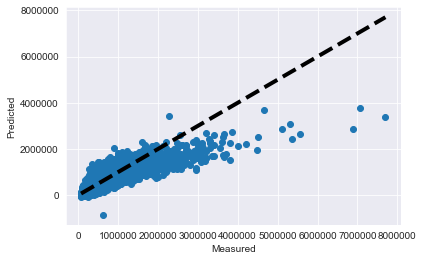

In [38]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

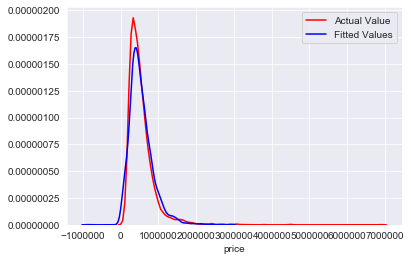

In [39]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

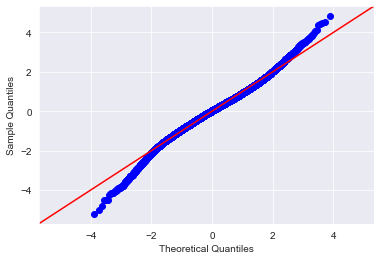

In [40]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

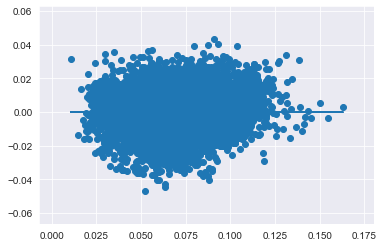

In [41]:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(df))]);

In [42]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

In [43]:
cv_10_results

array([-3.92610919e+10, -4.12399916e+10, -3.21904514e+10, -4.29693169e+10,
       -3.66097944e+10, -3.26441051e+10, -3.18978155e+10, -3.61993345e+10,
       -3.96559810e+10, -3.98627895e+10])

In [44]:
print('Test Mean Squarred Error:', mse_test)
print ('Results of 10-fold cross-validation test: ', cv_10_results.mean())

Test Mean Squarred Error: 37322292019.57791
Results of 10-fold cross-validation test:  -37253067169.147865


### I seem to have radically decreased the amount of multicollinearity (as per the Cond. No) 
- The RMSE is not as bad as it was originally. We are under the 200,000 dollar mark. However, this model has a long way to go before it will be shown to any real clients. The R-Squared, however, is 0.788 which is something to be proud of. 
- I am satisfied with this model for now. Let's talk interpretation and visualization.

# Alright, let's talk about what all this means:

In [ ]:
model.params.sort_values(ascending=False)
# Sort values in descending order in terms of how they affect price.

In [ ]:
model.params.log_sqft_living * 100

# Seems to mean that a 1% increase in the square feet leads to a 7.4% increase in price
# A 4000 sq. ft. house that costs 500,000 dollars could increase to 4040 sq. ft. and to $537,000 
# (If you had the ability to renovate?)

In [ ]:
model.params.waterfront_1_0 * 100

# Seems to mean that a waterfront view leads to a 2.5% increase in price
# This is a strange observation. It doesn't sound accurate.

In [ ]:
model.params.log_sqft_living15 * 100

# Seems to mean that a 1% increase in the square feet of the houses of the 15 nearest neighbors leads to a 2.9% increase in price

# Presentation Prep

## What information are we interested in for first time buyers?
- First of all, what are the most important features when considering price?
    - Since the average salary of someone in King County is 99,000 dollars, perhaps a cap on price of 500,000 would be a good idea for the next few questions:
- What size house should we be looking at with a max budget of 500,000 dollars?
- What about the size of our neighbors' houses?
- Where in Seattle should we set ourselves up with a max budget of 500,000 dollars?

In [ ]:
order_of_features = model.params.drop(['Intercept']).abs().sort_values(ascending=True)
# Drop intercept since it is not a parameter that concerns us.

In [ ]:
order_of_features.plot(kind='barh' , color='red', figsize=(7,7));
plt.title('Most Important Features For Change in Price', fontsize=16);
plt.xlabel("Change in Price");
plt.ylabel("Features");
# Create a bar graph that orders our most important features for price change

### Below we have plots for the living space of neighbors as well as our buyers.
- The first plot just considers budget. The second will zoom in on the data relevant to our buyers to create a better picture.

In [ ]:
df_1.plot(kind='scatter', x='sqft_living15', y='price', alpha=0.4, color='green', figsize=(7,7))
plt.xlim(0, 10000)
plt.ylim(0, 500000)
plt.xlabel("15 Nearest Neighbors' Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title('Living Space of Neighbors v. Price of House (Max: $500,000)', fontsize=16);
plt.show();

In [ ]:
df_1.plot(kind='scatter', x='sqft_living15', y='price', alpha=0.4, color='green', figsize=(7,7))
plt.xlim(0, 5000)
plt.ylim(0, 500000)
plt.xlabel("15 Nearest Neighbors' Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title("Neighbors' Space v. Price (Max: $500,000 & 5000 Sq.Ft.)", fontsize=16);
plt.show();

In [ ]:
df_1.plot(kind='scatter', x='sqft_living', y='price', alpha=0.2, color='blue', figsize=(7,7))
plt.xlim(0, 10000)
plt.ylim(0, 500000)
plt.xlabel("Your Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title('Your Living Space v. Price (Max: $500,000)', fontsize=16);
plt.show();

In [ ]:
df_1.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='blue', figsize=(7,7))
plt.xlim(0, 5000)
plt.ylim(0, 500000)
plt.xlabel("Your Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title('Your Space v. Price (Max: $500,000 & 5000 Sq.Ft.)', fontsize=16);
plt.show(); 

### We imagine Waterfront isn't going to be a choice location for our buyers but there may be a few houses that fit the budget. We created a visualization for them here:

In [ ]:
waterfront_v_price = df_1.groupby('waterfront')['price'].mean()
waterfront_v_price.plot(kind='bar' , color='orange', figsize=(7,7));
plt.title('Waterfront View', fontsize=16);
plt.xlabel("Waterfront");
plt.ylabel("Price");

### Finally, what location in Seattle would be best for our buyers? Let's create a map.

In [ ]:
df2 = df_1[df_1["price"] <= 500000]


In [ ]:
df3 = df2[df2["sqft_living"] <= 4000]


In [ ]:
df3.plot(kind="scatter", x='long', y='lat',
    c='price', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.8, sharex=False, figsize=(10,7),)
plt.title('Houses under $500,000 with 4000 square feet or less', fontsize=16);
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show();

# Conclusions:

1. The square feet of the home itself is the most important piece of information when it comes to change in price.
    - Could be something to think about when it comes to an investment for our FTBs
2. The square feet of those living nearby you with a maximum budget of 500,000 dollars will be between 1000 and 3000 square feet.
3. The square feet you should be looking for with a max price of 500,000 dollars is around 3000, although there are a few 4000 sq. ft. houses available
4. If the house has a waterfront view, there is a major impact in price however first-time buyers might not be able to afford a house like this at the moment. 
4. If you are trying to be frugal, it would be best to look in the southwest of King County, particularly around Federal Way (Zip Codes: 98001, 98003, 98023, 98063, 98093)